1. Data Exploration and Preprocessing

● Load the dataset and inspect for missing values, outliers, or inconsistencies.

● Apply normalization or standardization to the spectral data as needed.

● Visualize spectral bands (e.g., line plots for average reflectance, heatmaps for sample
comparisons).

In [ ]:
# List of important libraries which is required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

In [ ]:
# Using Google Colab
from google.colab import files
files.upload()

In [46]:
# Loading the dataset
df = pd.read_csv("TASK-ML-INTERN.csv")

In [47]:
# Showing the dataset
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [ ]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [ ]:
# Check basic information
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [ ]:
# Checking the null values
df.isnull().sum()

,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


In [ ]:
X = df.iloc[:, 1:-1]  # Exclude 'hsi_id' and 'vomitoxin_ppb'

# Normalize spectral data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recreate DataFrame with original column names
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[1:-1])

# Ensure correct target variable name
df_scaled['vomitoxin_ppb'] = df['vomitoxin_ppb'].values  # Fix column reference

# Optional: Keep hsi_id for tracking
df_scaled.insert(0, 'hsi_id', df['hsi_id'].values)  # Ensures hsi_id remains first

# Check results
df_scaled

We are converting "hsi_id" values (which contain categorical labels like 'imagoai_corn_0', 'imagoai_corn_1', etc.) into numerical representations for better uniformity in machine learning models.

Here are two common ways to encode them:

Label Encoding (Assigns unique integers) This method assigns a unique integer to each category

One-Hot Encoding (Creates binary columns) If the number of unique categories is not too large, one-hot encoding can be used.

In [ ]:
# Using the lable mapping thing to showcase the usecaase of labelencoder and how's it is converting
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'hsi_id' column
df['hsi_id_encoded'] = label_encoder.fit_transform(df['hsi_id'])

# Optional: View mapping of original labels to numbers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'hsi_id' column
df['hsi_id'] = label_encoder.fit_transform(df['hsi_id'])


In [ ]:
# Removed Unnesscary Column
df = df.drop(['hsi_id_encoded'],axis=1)

In [ ]:
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,112,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,223,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,333,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,438,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,439,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,440,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,441,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


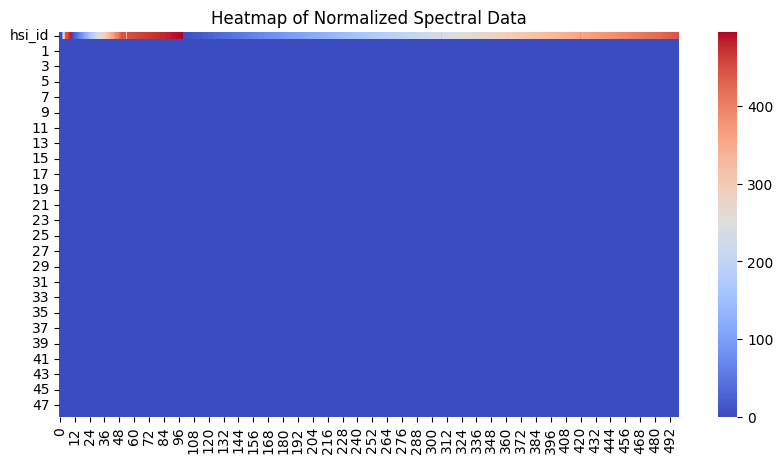

In [ ]:
# Visualize Spectral Data
plt.figure(figsize=(10, 5))
sns.heatmap(df.iloc[:, :50].T, cmap="coolwarm")  # Show first 50 bands
plt.title("Heatmap of Normalized Spectral Data")
plt.show()

Exploratory Data Analysis (EDA) Before modeling, we want to explore the data patterns.

Plot Distribution of vomitoxin_ppb:

Understand the distribution to see if it’s imbalanced

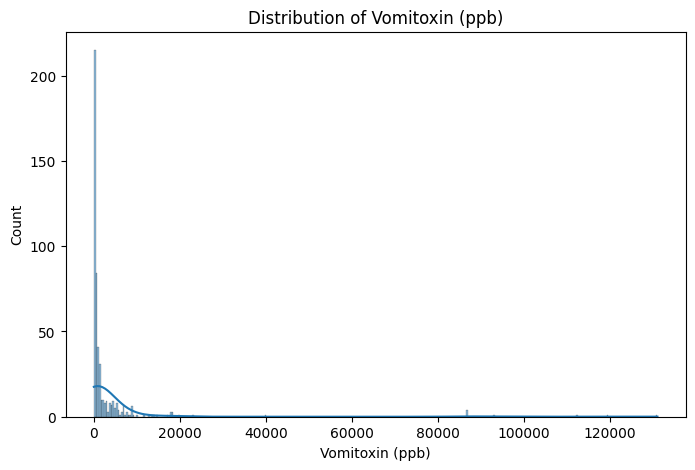

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['vomitoxin_ppb'], kde=True)
plt.title('Distribution of Vomitoxin (ppb)')
plt.xlabel('Vomitoxin (ppb)')
plt.show()

Check Correlations:

Identify which spectral bands are highly correlated with vomitoxin_ppb.

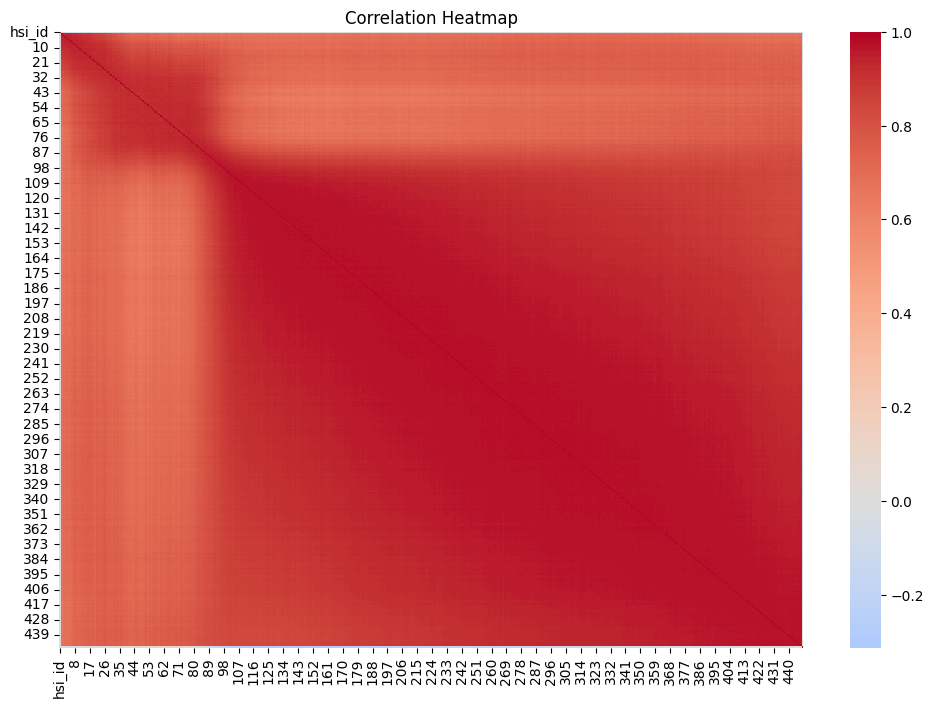

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

2. Dimensionality Reduction

● Implement Principal Component Analysis (PCA) or t-SNE to reduce feature dimensions.

● Report the variance explained by the top principal components (for PCA) or clustering patterns

(for t-SNE).
● Visualize the reduced data (e.g., 2D/3D scatter plots).

Dimensionality Reduction The spectral bands might be high-dimensional, so reducing dimensions could help.

Apply PCA:

Capture the most important variance in fewer dimensions.

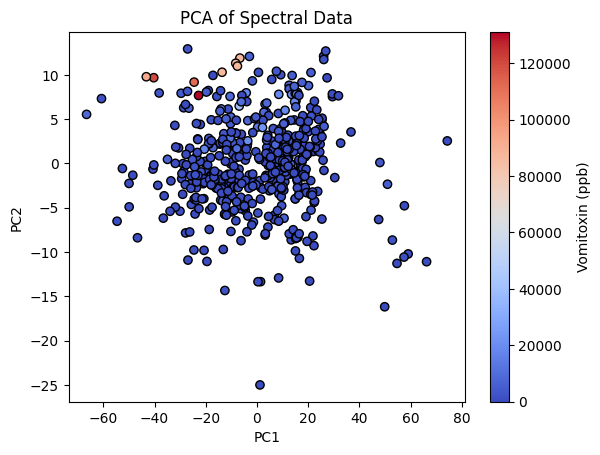

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Visualize PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['vomitoxin_ppb'], cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Vomitoxin (ppb)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Spectral Data')
plt.show()

3. Model Training

● Select a model: Deep Learning, CNN, GNN, or LSTM.

● Split the dataset into training (e.g., 80%) and testing (e.g., 20%) sets.

● Train the model and optimize hyperparameters (e.g., using grid search or random search).

Model Building You can now try different models to predict vomitoxin_ppb.

Train-Test Split:

Split the data for training and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('vomitoxin_ppb', axis=1)
y = df['vomitoxin_ppb']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 158201371.09250733
R² Score: 0.46940877903819533


In [ ]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

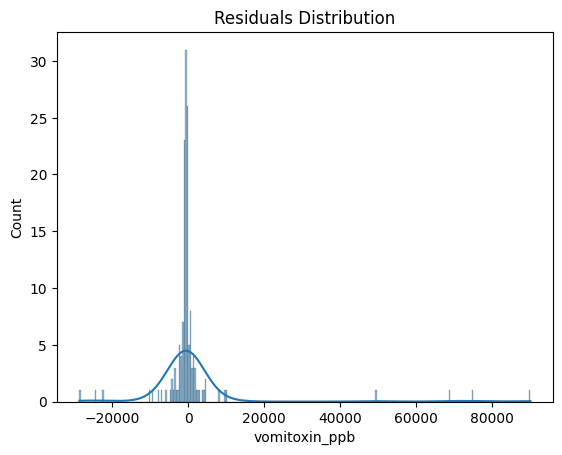

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Results:")
print("Mean Squared Error:", mse_gbr)
print("R² Score:", r2_gbr)

Gradient Boosting Results:
Mean Squared Error: 193930759.78140318
R² Score: 0.3495760630652426


In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("Mean Squared Error:", mse_xgb)
print("R² Score:", r2_xgb)


XGBoost Results:
Mean Squared Error: 183263625.34505478
R² Score: 0.38535254114289597


1. The models showed suboptimal performance with high MSE and low R², indicating potential issues with target distribution.

2. Visualizing the target variable helps check for imbalance, outliers, or skewness, which might affect model performance.
3. This insight can guide data transformation or resampling strategies to improve the model.

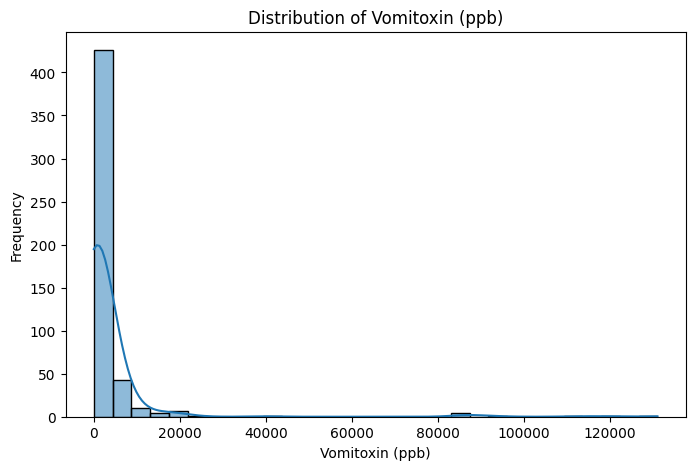

In [ ]:
# Check target distribution (bins help visualize imbalance)
plt.figure(figsize=(8, 5))
sns.histplot(df['vomitoxin_ppb'], bins=30, kde=True)
plt.title('Distribution of Vomitoxin (ppb)')
plt.xlabel('Vomitoxin (ppb)')
plt.ylabel('Frequency')
plt.show()

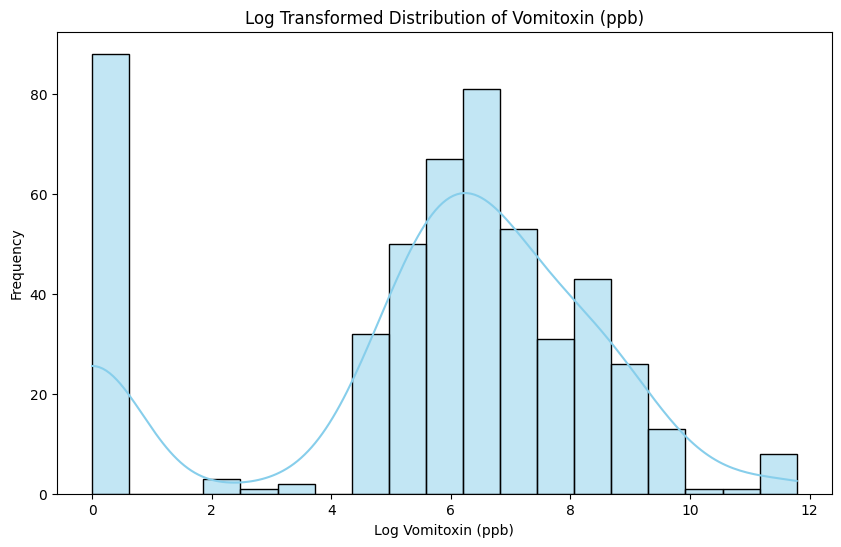

In [ ]:
# Apply log transformation to "Vomitoxin (ppb)"
df['Log_Vomitoxin'] = np.log1p(df['vomitoxin_ppb'])
# Plot the log-transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Vomitoxin'], kde=True, color='skyblue')
plt.title('Log Transformed Distribution of Vomitoxin (ppb)')
plt.xlabel('Log Vomitoxin (ppb)')
plt.ylabel('Frequency')
plt.show()

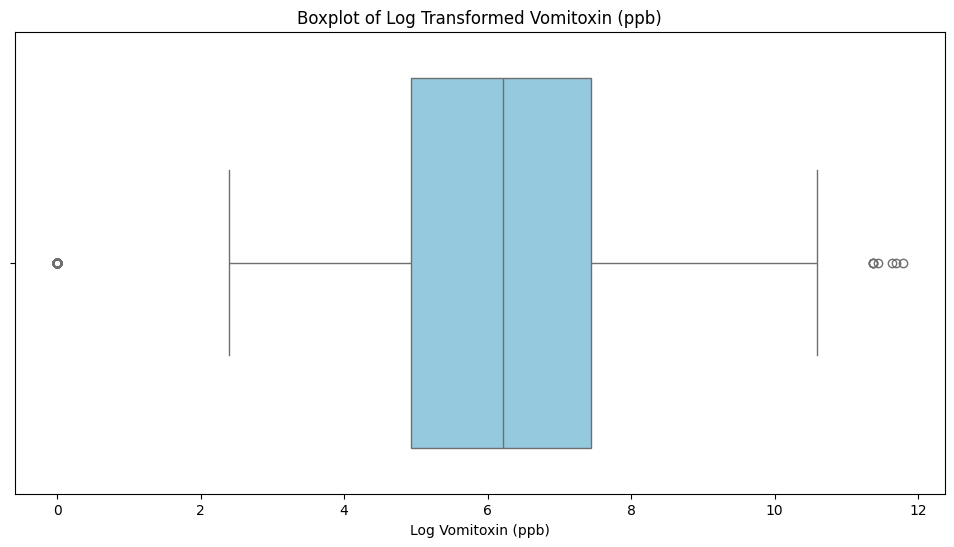

(96, 0)

In [ ]:
# Handling Outliers with the help of IQR
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate IQR for outlier detection
Q1 = df['Log_Vomitoxin'].quantile(0.25)
Q3 = df['Log_Vomitoxin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['Log_Vomitoxin'] < lower_bound) | (df['Log_Vomitoxin'] > upper_bound)]

# Calculate Z-scores
z_scores = (df['Log_Vomitoxin'] - df['Log_Vomitoxin'].mean()) / df['Log_Vomitoxin'].std()
outliers_z = df[np.abs(z_scores) > 3]

# Plot boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Log_Vomitoxin'], color='skyblue')
plt.title('Boxplot of Log Transformed Vomitoxin (ppb)')
plt.xlabel('Log Vomitoxin (ppb)')
plt.show()

# Results
outliers_count_iqr = len(outliers_iqr)
outliers_count_z = len(outliers_z)

outliers_count_iqr, outliers_count_z

Capping Method:

Capping (or winsorization) is applied to limit the influence of extreme outliers.

The 1st and 99th percentiles of the target variable are used as thresholds.

Any value below the 1st percentile is set to the lower bound, and any value above the 99th percentile is set to the upper bound.

This technique preserves the outliers but prevents them from skewing the overall distribution, ensuring they do not excessively affect the model.


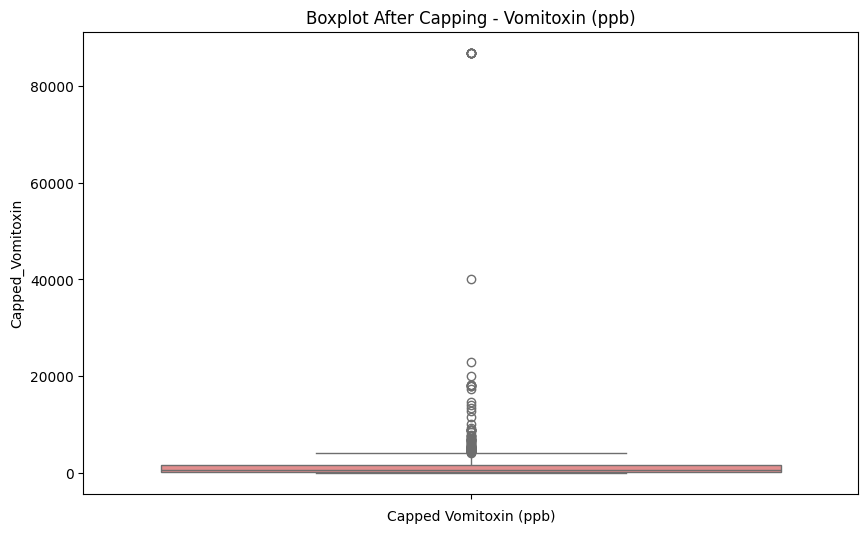

In [ ]:
# Capping method that preserve the outlier and does not let the values influence others
import numpy as np

# Calculate the 1st and 99th percentiles
lower_bound = np.percentile(df['vomitoxin_ppb'], 1)
upper_bound = np.percentile(df['vomitoxin_ppb'], 99)

# Apply capping
df['Capped_Vomitoxin'] = np.clip(df['vomitoxin_ppb'], lower_bound, upper_bound)

# Plot the capped boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df['Capped_Vomitoxin'], color='lightcoral')
plt.title('Boxplot After Capping - Vomitoxin (ppb)')
plt.xlabel('Capped Vomitoxin (ppb)')
plt.show()



 To handle the outliers and prevent them from negatively impacting the model, two techniques were applied:

Robust Scaling:
Robust Scaler is used to scale the target variable while being robust to outliers.
 1. It scales the data according to the median and interquartile range (IQR), making it less sensitive to extreme values.
 2. This transformation ensures that the model focuses more on the general data distribution rather than being influenced by extreme outliers.


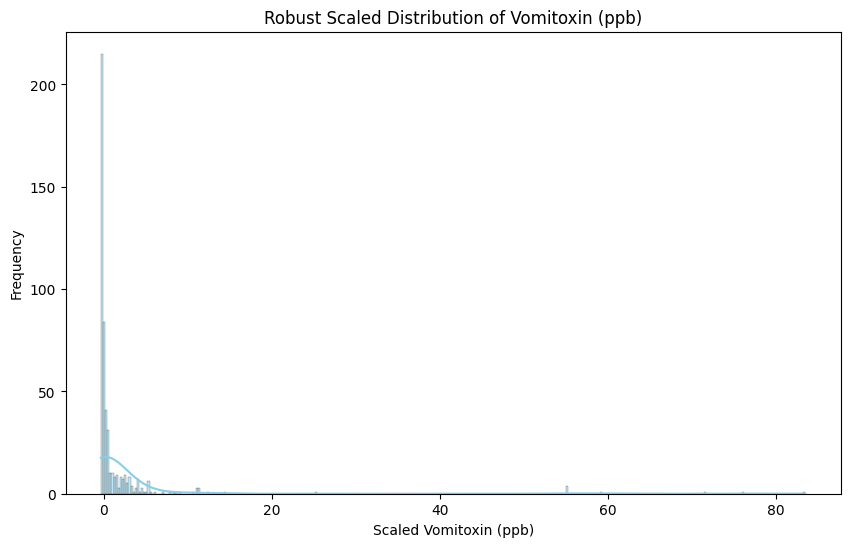

In [ ]:
from sklearn.preprocessing import RobustScaler

# Apply Robust Scaling
scaler = RobustScaler()
df['Scaled_Vomitoxin'] = scaler.fit_transform(df[['vomitoxin_ppb']])

# Plot the scaled distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Scaled_Vomitoxin'], kde=True, color='skyblue')
plt.title('Robust Scaled Distribution of Vomitoxin (ppb)')
plt.xlabel('Scaled Vomitoxin (ppb)')
plt.ylabel('Frequency')
plt.show()


# Setting up the model and utilizing hyperparameter optimization techniques such as GridSearchCV to enhance performance.

Model Evaluation

● Evaluate using regression metrics:

○ Mean Absolute Error (MAE)

○ Root Mean Squared Error (RMSE)

○ R² Score

● Visualize results:

○ Scatter plot of actual vs. predicted values (regression).


In [ ]:
# Load data
X = df.drop(['Capped_Vomitoxin'], axis=1)  # Features
y = df['Capped_Vomitoxin']  # Target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training RandomForest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
RandomForest Results: {'RMSE': 2198.955217754047, 'MAE': 256.76305, 'R²': 0.9827018559705026}


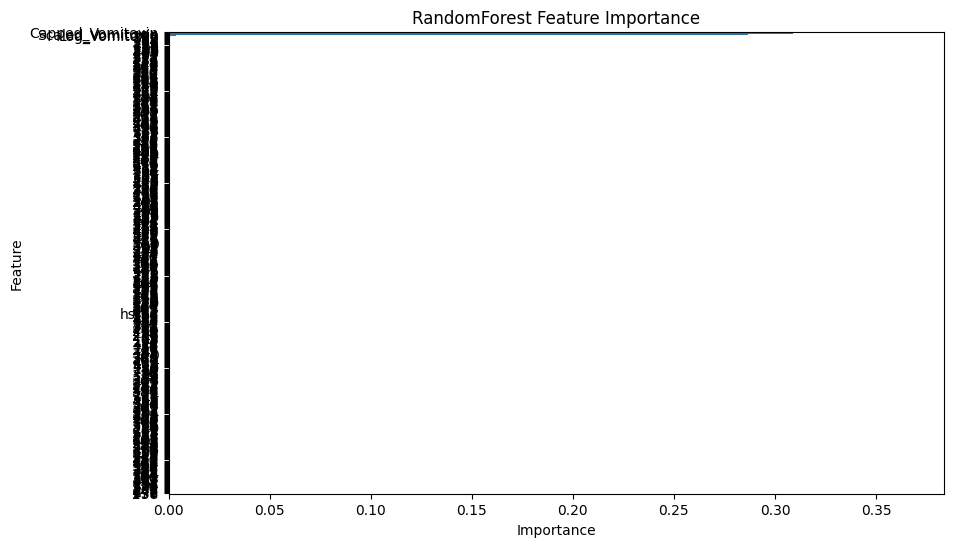

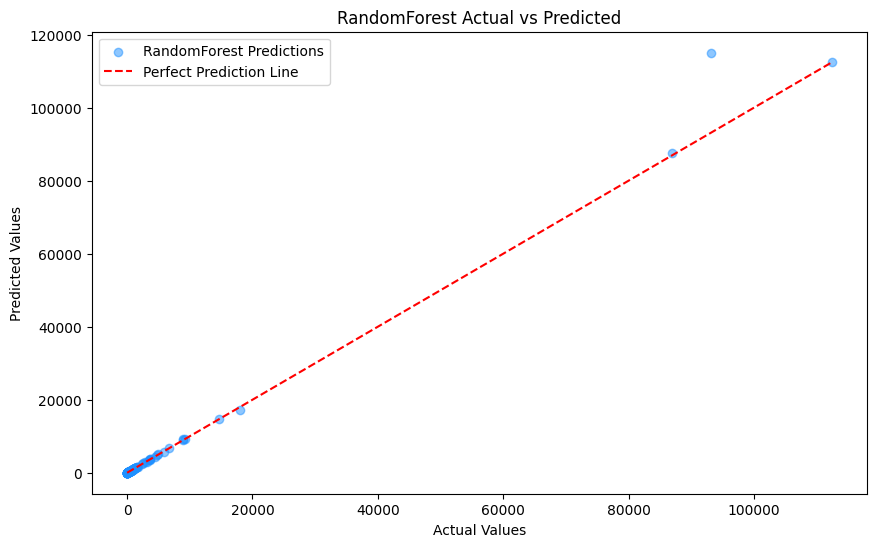

RandomForest training, tuning, and evaluation completed successfully! 🚀



In [ ]:
# Define model configurations
models = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 4]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'min_child_weight': [1, 3]
        }
    }
}
# Train and evaluate each model separately
def train_and_evaluate(model_name):
    print(f"Training {model_name}...")
    model_config = models[model_name]

    # Hyperparameter Tuning
    grid_search = GridSearchCV(model_config['model'], model_config['params'], cv=5, scoring='r2', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluation
    y_pred = best_model.predict(X_test)

    # Flatten if needed to avoid shape mismatch
    y_test_flat = np.array(y_test).flatten()
    y_pred_flat = np.array(y_pred).flatten()

    # Ensure equal length of predictions and actual values
    if len(y_test_flat) != len(y_pred_flat):
        min_len = min(len(y_test_flat), len(y_pred_flat))
        y_test_flat = y_test_flat[:min_len]
        y_pred_flat = y_pred_flat[:min_len]

    # Calculate metrics
    results = {
        'RMSE': np.sqrt(mean_squared_error(y_test_flat, y_pred_flat)),
        'MAE': mean_absolute_error(y_test_flat, y_pred_flat),
        'R²': r2_score(y_test_flat, y_pred_flat)
    }
    print(f"{model_name} Results: {results}")

    # Feature Importance (only for tree-based models)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = best_model.feature_importances_
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'{model_name} Feature Importance')
        plt.show()

    # Actual vs Predicted Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_flat, y_pred_flat, color='dodgerblue', alpha=0.5, label=f'{model_name} Predictions')
    plt.plot([min(y_test_flat), max(y_test_flat)], [min(y_test_flat), max(y_test_flat)], color='red', linestyle='--', label='Perfect Prediction Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Actual vs Predicted')
    plt.legend()
    plt.show()

    print(f"{model_name} training, tuning, and evaluation completed successfully! 🚀\n")

# Run models separately
train_and_evaluate('RandomForest')

Training GradientBoosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
GradientBoosting Results: {'RMSE': 3170.0424709964864, 'MAE': 391.0282417591796, 'R²': 0.9640501650767882}


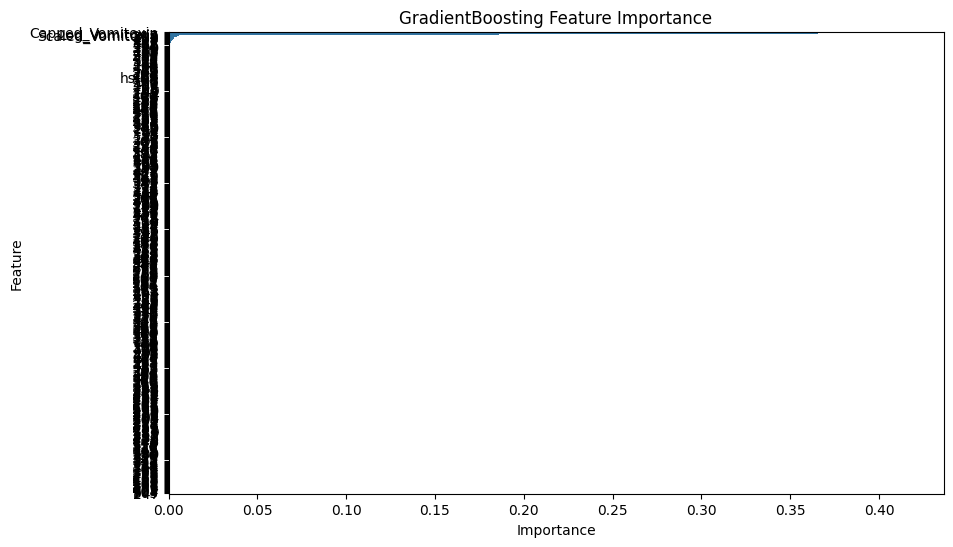

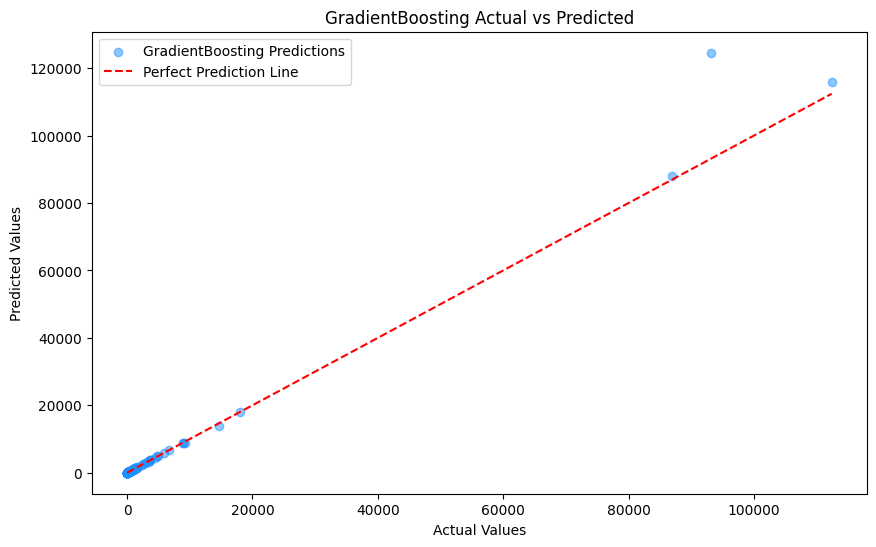

GradientBoosting training, tuning, and evaluation completed successfully! 🚀



In [49]:
# Train and evaluate each model separately
def train_and_evaluate(model_name):
    print(f"Training {model_name}...")
    model_config = models[model_name]

    # Hyperparameter Tuning
    grid_search = GridSearchCV(model_config['model'], model_config['params'], cv=5, scoring='r2', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluation
    y_pred = best_model.predict(X_test)

    # Flatten if needed to avoid shape mismatch
    y_test_flat = np.array(y_test).flatten()
    y_pred_flat = np.array(y_pred).flatten()

    # Ensure equal length of predictions and actual values
    if len(y_test_flat) != len(y_pred_flat):
        min_len = min(len(y_test_flat), len(y_pred_flat))
        y_test_flat = y_test_flat[:min_len]
        y_pred_flat = y_pred_flat[:min_len]

    # Calculate metrics
    results = {
        'RMSE': np.sqrt(mean_squared_error(y_test_flat, y_pred_flat)),
        'MAE': mean_absolute_error(y_test_flat, y_pred_flat),
        'R²': r2_score(y_test_flat, y_pred_flat)
    }
    print(f"{model_name} Results: {results}")

    # Feature Importance (only for tree-based models)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = best_model.feature_importances_
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'{model_name} Feature Importance')
        plt.show()

    # Actual vs Predicted Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_flat, y_pred_flat, color='dodgerblue', alpha=0.5, label=f'{model_name} Predictions')
    plt.plot([min(y_test_flat), max(y_test_flat)], [min(y_test_flat), max(y_test_flat)], color='red', linestyle='--', label='Perfect Prediction Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Actual vs Predicted')
    plt.legend()
    plt.show()

    print(f"{model_name} training, tuning, and evaluation completed successfully! 🚀\n")

# Run models separately
train_and_evaluate('GradientBoosting')

Training XGBoost...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBoost Results: {'RMSE': 2612.5449842883654, 'MAE': 350.33432025790216, 'R²': 0.975582888117694}


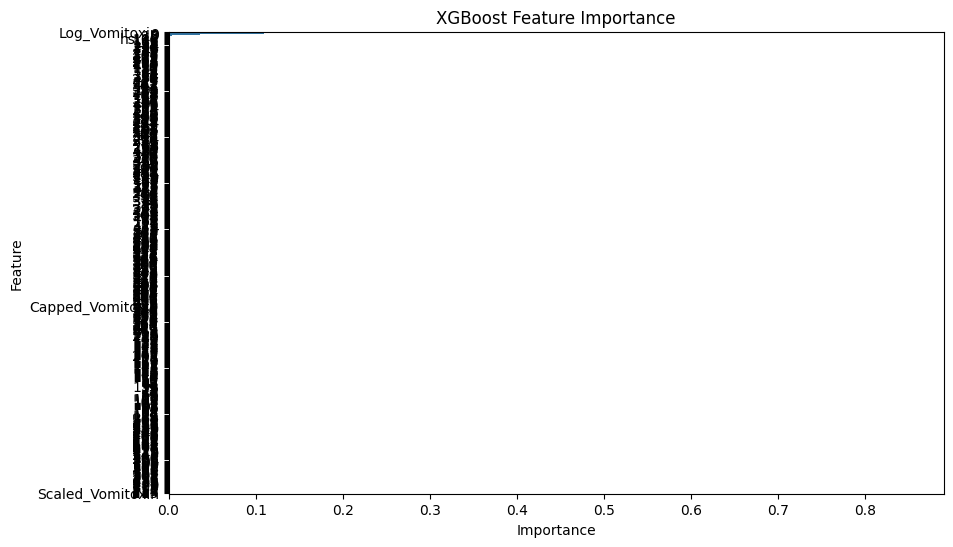

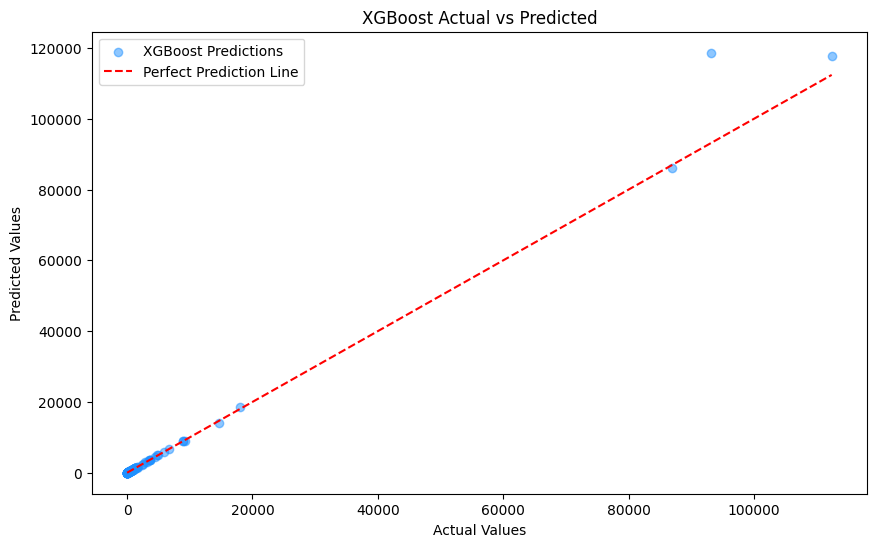

XGBoost training, tuning, and evaluation completed successfully! 🚀



In [50]:
# Train and evaluate each model separately
def train_and_evaluate(model_name):
    print(f"Training {model_name}...")
    model_config = models[model_name]

    # Hyperparameter Tuning
    grid_search = GridSearchCV(model_config['model'], model_config['params'], cv=5, scoring='r2', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluation
    y_pred = best_model.predict(X_test)

    # Flatten if needed to avoid shape mismatch
    y_test_flat = np.array(y_test).flatten()
    y_pred_flat = np.array(y_pred).flatten()

    # Ensure equal length of predictions and actual values
    if len(y_test_flat) != len(y_pred_flat):
        min_len = min(len(y_test_flat), len(y_pred_flat))
        y_test_flat = y_test_flat[:min_len]
        y_pred_flat = y_pred_flat[:min_len]

    # Calculate metrics
    results = {
        'RMSE': np.sqrt(mean_squared_error(y_test_flat, y_pred_flat)),
        'MAE': mean_absolute_error(y_test_flat, y_pred_flat),
        'R²': r2_score(y_test_flat, y_pred_flat)
    }
    print(f"{model_name} Results: {results}")

    # Feature Importance (only for tree-based models)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = best_model.feature_importances_
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'{model_name} Feature Importance')
        plt.show()

    # Actual vs Predicted Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_flat, y_pred_flat, color='dodgerblue', alpha=0.5, label=f'{model_name} Predictions')
    plt.plot([min(y_test_flat), max(y_test_flat)], [min(y_test_flat), max(y_test_flat)], color='red', linestyle='--', label='Perfect Prediction Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Actual vs Predicted')
    plt.legend()
    plt.show()

    print(f"{model_name} training, tuning, and evaluation completed successfully! 🚀\n")

# Run models separately
train_and_evaluate('XGBoost')